In [1]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from MobileNetV3 import *
from engine import *
from efficientNet import *
from data_transforms import *

change_to_disk()
data_dir = Path("clean_split_1k/")
models_path = Path('Models/')
saves = Path('Trainning_results_saves/')

In [2]:
image_shape = (1920, 1080)
resize_factor = 0.3
resize = np.multiply(image_shape,resize_factor)
resize = [int(resize[1]), int(resize[0])]

data_transform = create_transform(resize=resize, rotate=180, color_dev=True, transf_tensor=True, normalize=True)

BATCH_SIZE = 16
train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size = BATCH_SIZE)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


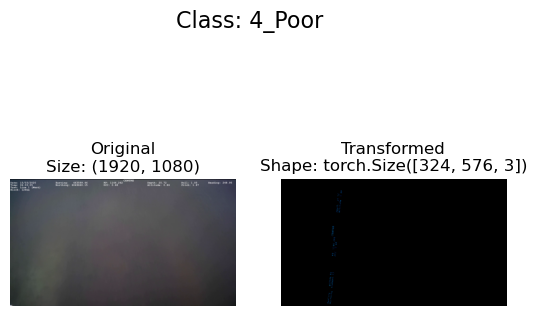

In [3]:
list_imgs = list(data_dir.glob("*/*/*.png"))

plot_transformed_images(image_paths=list_imgs,
                        transform=data_transform,
                        n=1,
                        seed=None)

In [3]:
NUM_EPOCHS = 100
lr = 0.001
device = get_device()

resnet18 = ResNet18()
resnet50 = ResNet50()
mobnet_sml = MobileNetV3("small")
mobnet_lrg = MobileNetV3("large")
effnetb0 = EfficientNetB0()
effnetb5 = EfficientNetB5()

loss_fn = nn.CrossEntropyLoss()

In [ ]:
model_name = "ResNet18"
model_folder_path = models_path / model_name
model_name_folder_path = model_folder_path / model_name

#Train ResNet18
resnet18.to(device)
nadam_optim = torch.optim.NAdam(params=resnet18.parameters(), lr=lr)
train_resnet18_results, train_time_resnet18 = train(resnet18, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

In [ ]:
eval_resnet18_results = eval_model(resnet18, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))
resnet18_results = [train_resnet18_results, train_time_resnet18, eval_resnet18_results]
final_save(model_folder_path,model_name, NUM_EPOCHS, resnet18, resnet18_results)

In [ ]:
model_name = "ResNet50"
model_folder_path = models_path / model_name
check_dir(model_folder_path)
model_name_folder_path = model_folder_path / model_name

#Train ResNet50
resnet50.to(device)
nadam_optim = torch.optim.NAdam(params=resnet50.parameters(), lr=lr)
train_resnet50_results, train_time_resnet50 = train(resnet50, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

In [ ]:
eval_resnet50_results = eval_model(resnet50, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))
resnet50_results = [train_resnet50_results, train_time_resnet50, eval_resnet50_results]
final_save(model_folder_path,model_name, NUM_EPOCHS, resnet50, resnet50_results)

In [ ]:
model_name = "MobileNetSmall"
model_folder_path = models_path / model_name
check_dir(model_folder_path)
model_name_folder_path = model_folder_path / model_name

#Train MobileNetV3 Small
mobnet_sml.to(device)
nadam_optim = torch.optim.NAdam(params=mobnet_sml.parameters(), lr=lr)
train_mobnet_sml_results, train_time_mobnet_sml = train(mobnet_sml, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

In [ ]:
eval_mobnet_sml_results = eval_model(mobnet_sml, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))
mobnet_sml_results = [train_mobnet_sml_results, train_time_mobnet_sml, eval_mobnet_sml_results]
final_save(model_folder_path,model_name, NUM_EPOCHS, mobnet_sml, mobnet_sml_results)

In [ ]:
model_name = "MobileNetLarge"
model_folder_path = models_path / model_name
check_dir(model_folder_path)
model_name_folder_path = model_folder_path / model_name

#Train MobileNetV3 Large
mobnet_lrg.to(device)
nadam_optim = torch.optim.NAdam(params=mobnet_lrg.parameters(), lr=lr)
train_mobnet_lrg_results, train_time_mobnet_lrg = train(mobnet_lrg, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

In [ ]:
eval_mobnet_lrg_results = eval_model(mobnet_lrg, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))
mobnet_lrg_results = [train_mobnet_lrg_results, train_time_mobnet_lrg, eval_mobnet_lrg_results]
final_save(model_folder_path, model_name, NUM_EPOCHS, mobnet_lrg, mobnet_lrg_results)

In [ ]:
model_name = "EfficientNetB0"
model_folder_path = models_path / model_name
check_dir(model_folder_path)
model_name_folder_path = model_folder_path / model_name

#Train EfficientNet B0
effnetb0.to(device)
nadam_optim = torch.optim.NAdam(params=effnetb0.parameters(), lr=lr)
train_effnetb0_results, train_time_effnetb0 = train(effnetb0, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

In [ ]:
eval_effnetb0_results = eval_model(effnetb0, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))
effnetb0_results = [train_effnetb0_results, train_time_effnetb0, eval_effnetb0_results]
final_save(model_folder_path, model_name, NUM_EPOCHS, effnetb0, effnetb0_results)

In [ ]:
model_name = "EfficientNetB5"
model_folder_path = models_path / model_name
check_dir(model_folder_path)
model_name_folder_path = model_folder_path / model_name

#Train EfficientNet B5
effnetb5.to(device)
nadam_optim = torch.optim.NAdam(params=effnetb5.parameters(), lr=lr)
train_effnetb5_results, train_time_effnetb5 = train(effnetb5, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

In [ ]:
eval_effnetb5_results = eval_model(effnetb5, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))
effnetb5_results = [train_effnetb5_results, train_time_effnetb5, eval_effnetb5_results]
final_save(model_folder_path, model_name, NUM_EPOCHS, effnetb5, effnetb5_results)

In [7]:
model_name = "ResNet18"
model = ResNet18
res18_results, final_res18_model, best_res18_model = load_results_model(model_name, model, NUM_EPOCHS, 82, device)

best_res18_model.to(device)
final_res18_model.to(device)
best_resnet18_eval_results = eval_model(best_res18_model,test_dl,loss_fn = loss_fn, accuracy_fn=accuracy_fn, device=device, dummy_input=torch.rand(16, 3, resize[0], resize[1]).to(device))
final_resnet18_eval_results = eval_model(final_res18_model,test_dl,loss_fn = loss_fn, accuracy_fn=accuracy_fn, device=device, dummy_input=torch.rand(16, 3, resize[0], resize[1]).to(device))

In [ ]:
model_name = "ResNet50"
model = ResNet50
res50_results, final_res50_model, best_res50_model = load_results_model(model_name, model, NUM_EPOCHS, 20, device)

best_res50_model.to(device)
best_resnet50_eval_results = eval_model(best_res50_model,test_dl,loss_fn = loss_fn, accuracy_fn=accuracy_fn, device=device, dummy_input=torch.rand(16, 3, resize[0], resize[1]).to(device))
final_res50_model.to(device)
final_resnet50_eval_results = eval_model(final_res50_model,test_dl,loss_fn = loss_fn, accuracy_fn=accuracy_fn, device=device, dummy_input=torch.rand(16, 3, resize[0], resize[1]).to(device))

In [ ]:
model_name = "MobileNetSmall"
model = MobileNetSmall
mobnet_sml_results, final_mobnet_sml_model, best_mobnet_sml_model = load_results_model(model_name, model, NUM_EPOCHS, 32, device)

best_mobnet_sml_model.to(device)
best_mobnet_sml_eval_results = eval_model(best_mobnet_sml_model,test_dl,loss_fn = loss_fn, accuracy_fn=accuracy_fn, device=device, dummy_input=torch.rand(16, 3, resize[0], resize[1]).to(device))
final_mobnet_sml_model.to(device)
final_mobnet_sml_eval_results = eval_model(final_mobnet_sml_model,test_dl,loss_fn = loss_fn, accuracy_fn=accuracy_fn, device=device, dummy_input=torch.rand(16, 3, resize[0], resize[1]).to(device))

In [5]:
model_name = "MobileNetLarge"
model = MobileNetLarge
mobnet_lrg_results, final_mobnet_lrg_model, best_mobnet_lrg_model = load_results_model(model_name, model, NUM_EPOCHS, 85, device)

best_mobnet_lrg_model.to(device)
best_mobnet_lrg_eval_results = eval_model(best_mobnet_lrg_model,test_dl,loss_fn = loss_fn, accuracy_fn=accuracy_fn, device=device, dummy_input=torch.rand(16, 3, resize[0], resize[1]).to(device))
final_mobnet_lrg_model.to(device)
final_mobnet_sml_eval_results = eval_model(final_mobnet_lrg_model,test_dl,loss_fn = loss_fn, accuracy_fn=accuracy_fn, device=device, dummy_input=torch.rand(16, 3, resize[0], resize[1]).to(device))

  0%|          | 0/32 [00:02<?, ?it/s]

  0%|          | 0/32 [00:02<?, ?it/s]

In [4]:
model_name = "EfficientNetB0"
model = EfficientNetB0
effnetb0_results, final_effnetb0_model, best_effnetb0_model = load_results_model(model_name, model, NUM_EPOCHS, 42, device)

best_effnetb0_model.to(device)
best_effnetb0_eval_results = eval_model(best_effnetb0_model,test_dl,loss_fn = loss_fn, accuracy_fn=accuracy_fn, device=device, dummy_input=torch.rand(16, 3, resize[0], resize[1]).to(device))
final_effnetb0_model.to(device)
final_effnetb0_eval_results = eval_model(final_effnetb0_model,test_dl,loss_fn = loss_fn, accuracy_fn=accuracy_fn, device=device, dummy_input=torch.rand(16, 3, resize[0], resize[1]).to(device))

  0%|          | 0/32 [00:02<?, ?it/s]

  0%|          | 0/32 [00:02<?, ?it/s]

In [ ]:
plot_loss_curves(train_resnet18_results,"ResNet18"), plot_loss_curves(train_resnet18_results,"ResNet50"),
plot_loss_curves(train_mobnet_lrg_results,"MobileNet V3 Large"), plot_loss_curves(train_mobnet_sml_results,"MobileNet V3 Small"),
plot_loss_curves(train_effnetb0_results,"EfficientNet B0"), plot_loss_curves(train_effnetb5_results,"EfficientNet B5"),

In [ ]:
plot_confusion_matrix(resnet18,test_dl,device,class_names, "ResNet18"), plot_confusion_matrix(resnet50, test_dl, device, class_names, "ResNet50"),
plot_confusion_matrix(mobnet_lrg, test_dl, device, class_names, "MobileNetV3 Large"), plot_confusion_matrix(mobnet_sml, test_dl, device, class_names, "MobileNetV3 Small"),
plot_confusion_matrix(effnetb0,test_dl,device,class_names, "EfficientNet B0"), plot_confusion_matrix(effnetb5, test_dl, device, class_names, "EfficientNet B5")